### Student Information
Name:李敬淇

Student ID:112033631

GitHub ID:Skccli

Kaggle name:Skccli

Kaggle private scoreboard snapshot:

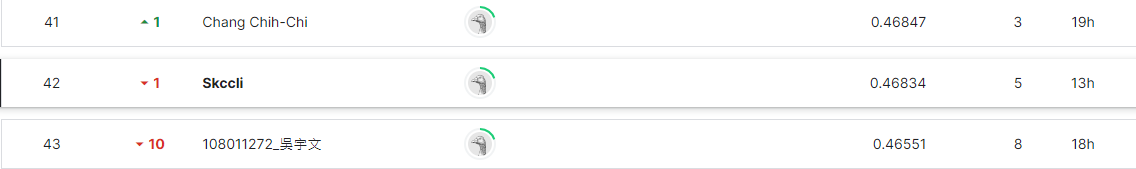

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

# Part1 LAB2 

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [6]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

# learn the vocabulary and return doc-term matrix
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)
term_frequencies = []

for j in range(0,train_counts.shape[1]):
    term_frequencies.append(sum(train_counts[:,j].toarray()))

# Plot the distribution with higher frequency features.

sorted = pd.DataFrame(term_frequencies, columns=['freq'])
sorted = sorted.sort_values(by=['freq'], ascending=False)
idx = (sorted.index).to_list()[:30]

fig = px.bar(x=count_vect.get_feature_names_out()[idx], y=sorted[:30]['freq'].to_list(),
             labels = {'x':'Feature names', 'y':'Frequencies'},
             title  = "Distribution of Features",category_orders = count_vect.get_feature_names_out()[idx])
fig.update_traces(texttemplate=sorted[:30]['freq'].to_list(), textposition='outside')
fig.show()

In [7]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [8]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [78]:
# Answer here
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_500 = TfidfVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
TFIDF_500.fit(train_df['text'])

c:\Users\Skccli\anaconda3\envs\datamining\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



TfidfVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x00000200DB4374C0>)

---


In [80]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\Users\Skccli\anaconda3\envs\datamining\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(1455563, 500)

## DT

In [81]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1455563, 500)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 500)
y_test.shape:  (411972,)


In [83]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'trust', 'sadness', 'joy', 'trust', 'surprise',
       'disgust', 'trust', 'trust', 'sadness'], dtype=object)

In [84]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.93
testing accuracy: 0.35


In [86]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.01      0.06      0.02      2241
anticipation       0.28      0.35      0.31     50999
     disgust       0.22      0.22      0.22     52088
        fear       0.06      0.15      0.09      6839
         joy       0.65      0.41      0.50    214748
     sadness       0.29      0.29      0.29     65296
    surprise       0.01      0.07      0.01      1272
       trust       0.10      0.29      0.15     18489

    accuracy                           0.35    411972
   macro avg       0.20      0.23      0.20    411972
weighted avg       0.45      0.35      0.38    411972



---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

confusion matrix是對模型預測與實際數據之間的差異進行視覺化工具。是用來了解預測模型性能的有效手段。它展示了預測的準確性，並通過揭示錯誤預測的類別來標識錯誤的分類。confusion matrix在匹配的col和raw上較深的陰影和較高的值表示準確性高，代表正確的預測。相反，在不匹配的col和raw上比較淺的陰影和較低的值，表示錯誤預測的次數相對較少。

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [87]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

bow_pred_train = clf.predict(X_train)
bow_pred_test  = clf.predict(X_test)

bow_acc_train = accuracy_score(y_true=y_train, y_pred=bow_pred_train)
bow_acc_test  = accuracy_score(y_true=y_test,  y_pred=bow_pred_test)

print('(BOW 500)training accuracy: {}'.format(round(bow_acc_train, 2)))
print('(BOW 500)testing  accuracy: {}'.format(round(bow_acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=bow_pred_test))

(BOW 500)training accuracy: 0.41
(BOW 500)testing  accuracy: 0.52
              precision    recall  f1-score   support

       anger       0.04      0.22      0.07      2241
anticipation       0.46      0.53      0.49     50999
     disgust       0.37      0.49      0.42     52088
        fear       0.13      0.29      0.18      6839
         joy       0.76      0.57      0.65    214748
     sadness       0.48      0.42      0.45     65296
    surprise       0.08      0.25      0.12      1272
       trust       0.25      0.48      0.33     18489

    accuracy                           0.52    411972
   macro avg       0.32      0.41      0.34    411972
weighted avg       0.59      0.52      0.54    411972



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Decision tree\
training accuracy: 0.93\
testing accuracy: 0.35\
Naives Bayes model\
training accuracy: 0.41\
testing  accuracy: 0.52\
我們可以看到DT的training accuracy非常之高，但是testing卻相當低，這是overfiting的表現。
然後比起DT，Naives Bayes model的training accuracy雖然不高，但是testing的結果卻是較好的。

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

In [88]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1455563, 500)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 500)
y_test.shape:  (411972,)


In [89]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1455563, 500)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 500)
y_test.shape:  (411972,)


In [90]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 0    anticipation
1         sadness
2            fear
3             joy
Name: emotion, dtype: object

y_train.shape:  (1455563,)
y_test.shape:  (411972,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]

y_train.shape:  (1455563, 8)
y_test.shape:  (411972, 8)


In [91]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  8


In [92]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_12 (Dense)            (None, 64)                32064     
                                                                 
 re_lu_4 (ReLU)              (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 re_lu_5 (ReLU)              (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 softmax_4 (Softmax)         (None, 8)                 0   

In [93]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
45487/45487 [==============================] - 84s 2ms/step - loss: 1.4766 - accuracy: 0.4601 - val_loss: 1.2177 - val_accuracy: 0.6319
Epoch 2/25
45487/45487 [==============================] - 101s 2ms/step - loss: 1.4403 - accuracy: 0.4729 - val_loss: 1.2276 - val_accuracy: 0.6259
Epoch 3/25
45487/45487 [==============================] - 116s 2ms/step - loss: 1.4307 - accuracy: 0.4767 - val_loss: 1.2306 - val_accuracy: 0.6180
Epoch 4/25
45487/45487 [==============================] - 130s 3ms/step - loss: 1.4255 - accuracy: 0.4788 - val_loss: 1.2173 - val_accuracy: 0.6165
Epoch 5/25
45487/45487 [==============================] - 136s 3ms/step - loss: 1.4221 - accuracy: 0.4799 - val_loss: 1.2212 - val_accuracy: 0.6230
Epoch 6/25
45487/45487 [==============================] - 136s 3ms/step - loss: 1.4194 - accuracy: 0.4814 - val_loss: 1.2395 - val_accuracy: 0.6131
Epoch 7/25
45487/45487 [==============================] - 137s 3ms/step - loss: 1.4176 - accuracy: 0.4818 - val_l

In [94]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3219/3219 [==============================] - 4s 1ms/step


array([[0.0027356 , 0.46766463, 0.00523362, 0.00883164, 0.38315064,
        0.0095959 , 0.00286625, 0.11992168],
       [0.00155273, 0.7733103 , 0.00144448, 0.00461601, 0.02051775,
        0.00673045, 0.00380543, 0.18802287],
       [0.04024871, 0.06172168, 0.2046584 , 0.01232281, 0.29367498,
        0.30990008, 0.0173426 , 0.06013071],
       [0.00280708, 0.07830758, 0.01563691, 0.0102265 , 0.6489617 ,
        0.02842671, 0.01241339, 0.2032201 ],
       [0.01173287, 0.48823968, 0.0356366 , 0.01993373, 0.16997764,
        0.03768936, 0.01004343, 0.22674666]], dtype=float32)

In [95]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anticipation', 'anticipation', 'sadness', 'joy', 'anticipation'],
      dtype=object)

In [96]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.61


In [97]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.460115,1.476564,0.631931,1.217699
1,1,0.472875,1.440347,0.625873,1.227554
2,2,0.476695,1.430721,0.618008,1.230604
3,3,0.478768,1.425547,0.616469,1.217259
4,4,0.479862,1.422052,0.623003,1.221221
5,5,0.481366,1.419401,0.613066,1.239457
6,6,0.481820,1.417629,0.629001,1.184489
7,7,0.482675,1.415991,0.615355,1.230781
8,8,0.483382,1.414597,0.615178,1.229517
9,9,0.483333,1.413875,0.615724,1.226825


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

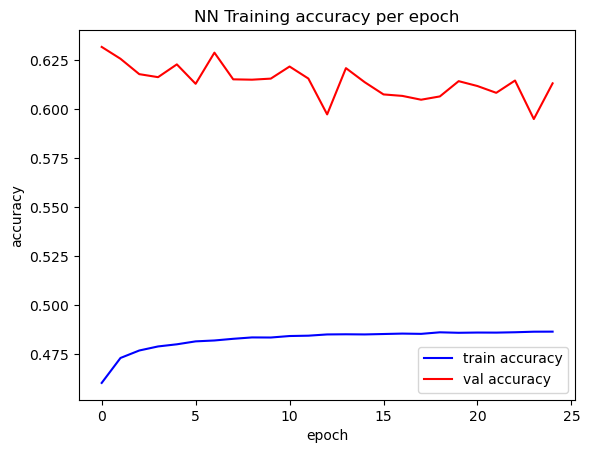

In [98]:
# Answer here
import matplotlib.pyplot as plt

plt.plot('epoch', 'accuracy', data=training_log, color = 'b', label='train accuracy')
plt.plot('epoch', 'val_accuracy', data=training_log, color = 'r', label='val accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('NN Training accuracy per epoch')
plt.legend()
plt.show()

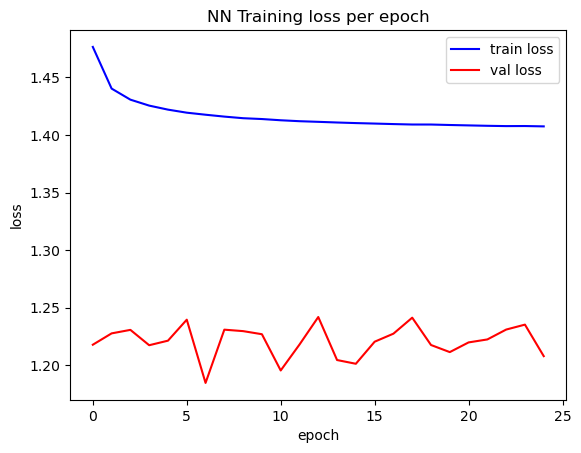

In [99]:
plt.plot('epoch', 'loss', data=training_log, color = 'b', label='train loss')
plt.plot('epoch', 'val_loss', data=training_log, color = 'r', label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('NN Training loss per epoch')
plt.legend()
plt.show()


透過觀察訓練和驗證的accurate和loss，我們可以檢查overfitting 和 underfitting。且正如上述圖表所示，Training的accurate表現的不是很突出，但驗證的部分卻是相較起來比較好的。而驗證的accurate和loss都比起training的表現來的好，代表我們的模型運作良好，較無overfitting的現象。

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


使用word vector來表示句子可能會有一些問題。第一，每個句子的長度是不同的，因此一些較短的句子可能會產生非常稀疏的矩陣。為了解決這個問題，要用Doc2Vec，就可以使用相應的package來擬合和轉換數據集為句子向量。或是使用計算詞向量的平均值，計算所有詞向量的平均值，但這個方法可能會使句子內單詞的順序的information會不見。此外使用 TF-IDF 計算詞向量的平均值，在計算每個句子的平均值之前，通過乘以 TF-IDF 分數，我們可以表示某個單詞在整個數據中的頻率。這樣可以保留更多原始句子的資訊，從而使model預測更準確。

### 7.1 Prepare training corpus

In [102]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['text', 'text_tokenized']].head()

,text,text_tokenized
0,people who post add me on snapchat must be deh...,"[people, who, post, add, me, on, snapchat, mus..."
1,brianklaas as we see trump is dangerous to fre...,"[brianklaas, as, we, see, trump, is, dangerous..."
2,now issa is stalking tasha 😂😂😂 lh,"[now, issa, is, stalking, tasha, 😂😂😂, lh]"
3,riskshow thekevinallison thx for the best time...,"[riskshow, thekevinallison, thx, for, the, bes..."
4,still waiting on those supplies liscus lh,"[still, waiting, on, those, supplies, liscus, lh]"


In [104]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['people', 'who', 'post', 'add', 'me', 'on', 'snapchat', 'must', 'be', 'dehydrated', 'cuz', 'man', 'thats', 'lh']),
       list(['brianklaas', 'as', 'we', 'see', 'trump', 'is', 'dangerous', 'to', 'freepress', 'around', 'the', 'world', 'what', 'a', 'lh', 'lh', 'trumplegacy', 'cnn']),
       list(['now', 'issa', 'is', 'stalking', 'tasha', '😂😂😂', 'lh'])],
      dtype=object)

---
### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [105]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [106]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([-0.29422748, -3.214973  , -3.0876286 ,  2.1260087 , -2.7256186 ,
       -2.3348994 , -0.6590044 , -0.02990604,  2.2316322 , -0.13903792,
        2.4147067 , -1.9670537 , -3.6502051 ,  0.9268857 , -1.5636618 ,
        1.6195724 , -5.532854  ,  1.8450326 , -3.2857711 , -4.4577775 ,
       -0.9979272 ,  3.5622911 , -4.0171895 ,  2.9689386 , -0.10853179,
        3.4838545 , -5.6009398 ,  1.2527847 , -1.5065194 ,  0.9067871 ,
       -0.7381899 , -3.9846401 ,  3.3367815 , -1.1739005 , -0.93234384,
       -1.5245243 ,  1.1803676 , -0.66224277, -2.9847553 ,  6.5431695 ,
       -0.37163237, -3.7276366 , -1.7141844 , -0.9461126 ,  1.7858664 ,
       -1.1378136 ,  0.8175245 , -0.9822644 ,  2.3813894 ,  1.7659086 ,
        1.3317969 ,  0.18822503,  1.3130329 , -3.3395832 ,  0.6301404 ,
        1.8687638 , -2.420384  , -2.027661  , -1.7181246 ,  0.75149363,
        2.7790453 , -3.0810304 ,  2.085187  , -2.1763864 , -0.29554275,
        3.004095  , -5.1861825 ,  3.8019135 , -3.1336179 ,  1.89

In [107]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.6334217190742493),
 ('celebrating', 0.5585090517997742),
 ('celebrate', 0.5570973753929138),
 ('weat', 0.5343586206436157),
 ('ma7shi', 0.5293888449668884),
 ('grateful', 0.5274568200111389),
 ('wishes❤️i', 0.5205811262130737),
 ('stavaonstl', 0.5198242664337158),
 ('nicholasxromero', 0.5187197923660278),
 ('thankful', 0.5147472023963928)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [116]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [117]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [118]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


In [119]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [120]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

In [121]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


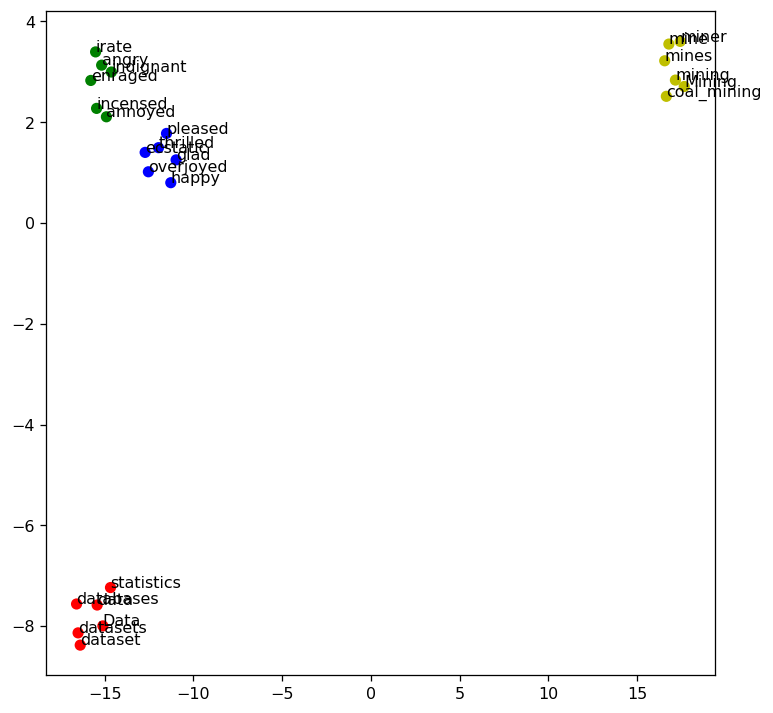

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

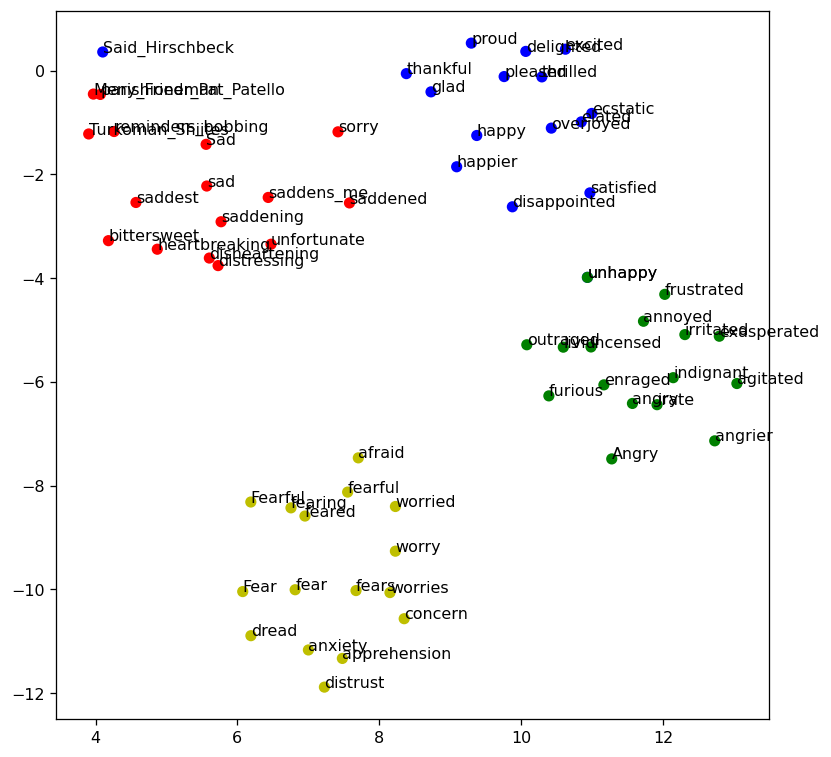

In [123]:
# Answer here
emo = ['angry', 'happy', 'sad', 'fear']
topn = 15

happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 100
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=48)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(8, 8), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part 2 kaggle

In [ ]:
### Begin Assignment Here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer


## STEP1:Load data

In [ ]:
data_identification = pd.read_csv("data_identification.csv")
emotion = pd.read_csv("emotion.csv")
sampleSubmission = pd.read_csv("sampleSubmission.csv")
raw_data = pd.read_json('tweets_DM.json',lines = True)

In [ ]:
# check

data_identification[:5]
# emotion[:5]
# sampleSubmission[:5]
# raw_data[:5]

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [ ]:
# split data for each columns
df = pd.json_normalize(data=raw_data['_source'])
# rename
df=df.rename(index=str,columns={"tweet.text":"text", "tweet.tweet_id":"tweet_id","tweet.hashtags":"hashtags"})
# add indendification
df=pd.merge(df,data_identification, on="tweet_id")


In [ ]:
#check

df[:5]

,hashtags,tweet_id,text,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test


## STEP2:Data preprocessing

In [ ]:
import re
from string import punctuation

def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  
    text = " ".join(text.split()) 
    return text

df['text'] = df['text'].map(preprocess_text)

In [ ]:
# check

df[0:5]

,hashtags,tweet_id,text,identification
0,[Snapchat],0x376b20,people who post add me on snapchat must be deh...,train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,brianklaas as we see trump is dangerous to fre...,train
2,[bibleverse],0x28b412,confident of your obedience i write to you kno...,test
3,[],0x1cd5b0,now issa is stalking tasha 😂😂😂 lh,train
4,[],0x2de201,trust is not the same as faith a friend is som...,test


In [ ]:
# splite data to train and test
train_df = df[df['identification']=='train']
train_df = pd.merge(train_df, emotion, on='tweet_id')

test_df = df[df['identification']=='test']
test_df["emotion"]=""

# drop some useless data
train_df = train_df.drop(['identification'], axis=1)
test_df = test_df.drop(['identification'], axis=1)
train_df = train_df.drop(['hashtags'], axis=1)
test_df = test_df.drop(['hashtags'], axis=1)

C:\Users\Skccli\AppData\Local\Temp\ipykernel_1276\2632234342.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# check
train_df[:5]

,tweet_id,text,emotion
0,0x376b20,people who post add me on snapchat must be deh...,anticipation
1,0x2d5350,brianklaas as we see trump is dangerous to fre...,sadness
2,0x1cd5b0,now issa is stalking tasha 😂😂😂 lh,fear
3,0x1d755c,riskshow thekevinallison thx for the best time...,joy
4,0x2c91a8,still waiting on those supplies liscus lh,anticipation


In [ ]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [ ]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

## STEP3: Feature engineering

In [ ]:
# like LAB1 we use Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
count_vect = CountVectorizer(max_features=100000,tokenizer= nltk.word_tokenize).fit(train_df['text'])
bow_transformed = count_vect.transform(train_df['text'])

c:\Users\Skccli\anaconda3\envs\datamining\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

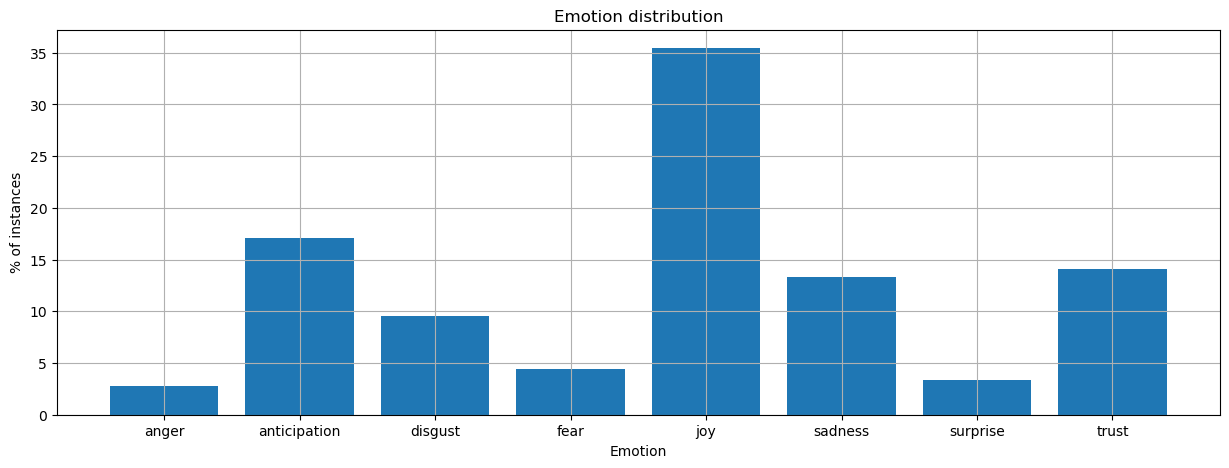

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## STEP4:Training model

In [ ]:
from sklearn.model_selection import train_test_split

X_train = bow_transformed
y_train = train_df['emotion']
X_test = count_vect.transform(test_df['text'])
y_test = test_df['emotion']

# check shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
print(train_df.shape)
print(test_df.shape)

X_train.shape:  (1455563, 5000)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 5000)
y_test.shape:  (411972,)
(1455563, 3)
(411972, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

LabelEncoder()

In [ ]:
import keras
import tensorflow as tf
from tensorflow.python.keras  import utils
from sklearn.preprocessing import LabelEncoder

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)

In [ ]:
input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)
print('input_shape: ', input_shape)
print('output_shape: ', output_shape)

input_shape:  5000
output_shape:  8


In [ ]:
# first try i only use 1st hidden layer with units = 16, trying to comfirm the model and save time(17min), get 0.44408 then to modify the unit , get 0.45664
# second try i use 2nd hidden layer with units = 64 and 32 (1st and 2nd)(80min), get 0.46413 and 0.46834

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, LeakyReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))
X = model_input

# 1st hidden layer
X_W1 = Dense(units=8)(X)  # try 16 32 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=32)(H1)  # try 16 32 64
H2 = LeakyReLU()(H1_W2)  # leakyrelu

# output layer
H2_W3 = Dense(units=output_shape)(H1)
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# show model construction
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 5000)]            0         
                                                                 
 dense_9 (Dense)             (None, 8)                 40008     
                                                                 
 re_lu_3 (ReLU)              (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 softmax_3 (Softmax)         (None, 8)                 0         
                                                                 
Total params: 40080 (156.56 KB)
Trainable params: 40080 (156.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 1
batch_size = 16

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger])

print('training finish')

90973/90973 [==============================] - 125s 1ms/step - loss: 1.3657 - accuracy: 0.5070
training finish


In [ ]:
from sklearn.metrics import accuracy_score

# predict and sve
prediction = model.predict(X_test, batch_size=128)
prediction = label_decode(label_encoder, prediction)

test_df['emotion'] = prediction
output = test_df[['tweet_id', 'emotion']].copy()
output = output.set_axis(["id", "emotion"], axis=1)
output.to_csv("try_01.csv", index=False)
output

3219/3219 [==============================] - 4s 1ms/step


,id,emotion
2,0x28b412,anticipation
4,0x2de201,anticipation
9,0x218443,joy
30,0x2939d5,joy
33,0x26289a,trust
...,...,...
1867525,0x2913b4,anticipation
1867529,0x2a980e,trust
1867530,0x316b80,sadness
1867531,0x29d0cb,joy
